In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import scipy.stats as stats
import os.path as op


import os


import seaborn as sns
sns.set(context="notebook", style="whitegrid", font_scale=1.2)

import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline


In [2]:
data = pd.read_csv("visual-Basketball.csv")

data.head()

,ID,GROUP,condition,trial_r,FirstGaze_r,Release_r,Finish_r,QED_r,QEstart_r,QEend_r,performance_r,condition_o,FirstGaze_o,Release_o,Finish_o,QED_o,QEstart_o,QEend_o,performance_o
0,1,EF-V,pre,1,1,161,220,564,118,151,1,post,52.0,114.0,183.0,531.0,55.0,87.0,4
1,1,NaN,pre,2,61,131,195,332,61,81,2,post,22.0,151.0,211.0,431.0,107.0,133.0,5
2,1,NaN,pre,3,20,151,216,298,120,138,1,post,44.0,97.0,155.0,132.0,65.0,73.0,3
3,1,NaN,pre,4,46,151,210,365,74,96,5,post,199.0,259.0,323.0,531.0,209.0,241.0,3
4,1,NaN,pre,5,1,126,184,132,62,70,2,post,26.0,98.0,159.0,1132.0,75.0,144.0,3


In [3]:
df=data.copy()
# read particular columns
df = df[['ID','condition','condition_o','trial_r', 'QED_r','performance_r','QED_o','performance_o' ]]  
# convert data to long format
df_l = pd.melt(df, id_vars=['ID','trial_r', 'QED_r' ,'performance_r','QED_o','performance_o' ],
               value_vars=['condition','condition_o'], var_name ='con', value_name ='condition2')
# add QED and perform columns based on condition
df_l['QED'] = np.where(df_l.condition2 =='pre',df_l.QED_r,df_l.QED_o)
df_l['Perform'] = np.where(df_l.condition2 =='pre',df_l.performance_r,df_l.performance_o)

# just report some columns 
df_l = df_l[['ID','trial_r','condition2', 'QED' ,'Perform']]
df_l.rename(columns={'trial_r':'trial'}, inplace=True)
df = df_l.copy()

df

,ID,trial,condition2,QED,Perform
0,1,1,pre,564.0,1
1,1,2,pre,332.0,2
2,1,3,pre,298.0,1
3,1,4,pre,365.0,5
4,1,5,pre,132.0,2
...,...,...,...,...,...
715,36,6,post,100.0,3
716,36,7,post,436.0,3
717,36,8,post,1722.0,1
718,36,9,post,2086.0,4


<Figure size 432x288 with 0 Axes>

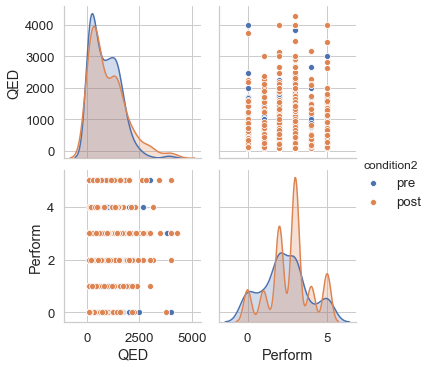

In [4]:
# Plot the remain columns
plt.figure()
cols_to_plot = df.columns[2:5].tolist() # Take the remaining columns for the second plot; those already include "Outcome"
sns.pairplot(df[cols_to_plot], hue = "condition2")
plt.show()

In [5]:
df_pre = df[df.condition2  == 'pre']
df_post = df[df.condition2  == 'post']

df_pre  = df_pre [['QED', 'Perform']]
df_post  = df_post [['QED', 'Perform']]

def corprob (X):
    dfr = len(X) - 2
    R = X.corr(method='pearson')
    m=R.shape
    for i in range(0, m[0]):
        for j in range(0, m[1]):
            if j>i:
                r2= R.iloc[i,j]**2
                Fstat = r2 * dfr/(1 - r2)
                p_value = stats.f.cdf(Fstat, 1, dfr)
                R.iloc[i,j] = 1-p_value
            if j==i:
                R.iloc[i,j] = "NA"
    return(R)

In [6]:
corprob(df_pre)

,QED,Perform
QED,NA,0.501931
Perform,-0.035501,NA


In [7]:
corprob(df_post)

,QED,Perform
QED,NA,0.60355
Perform,0.02746,NA


# Pre-processing of gaze data

In [8]:
df2=data.copy()
# read particular columns
df2 = df2[['ID','condition','condition_o','trial_r', 'QED_r' ,'FirstGaze_r',
         'QEstart_r','QEend_r','Release_r',
         'performance_r','FirstGaze_o','QED_o',
         'QEstart_o','QEend_o','Release_o','performance_o' ]]  
# convert data to long format
df_2 = pd.melt(df2, id_vars=['ID','trial_r', 'QED_r' ,'FirstGaze_r','QEstart_r',
                            'QEend_r','Release_r','performance_r','FirstGaze_o','QED_o',
                            'QEstart_o','QEend_o','Release_o','performance_o' ],
               value_vars=['condition','condition_o'], var_name ='con', value_name ='condition0')

# add some columns based on the pre or post condition
df_2['start'] = np.where(df_2.condition0 =='pre',df_2.FirstGaze_r,df_2.FirstGaze_o)
df_2['Perform'] = np.where(df_2.condition0 =='pre',df_2.performance_r,df_2.performance_o)
df_2['Release'] = np.where(df_2.condition0 =='pre',df_2.Release_r,df_2.Release_o)
df_2['QED'] = np.where(df_2.condition0 =='pre',df_2.QED_r,df_2.QED_o)
df_2.rename(columns={'condition0':'condition'}, inplace=True)
df_2.rename(columns={'trial_r':'trial'}, inplace=True)
df_2 = df_2[['ID','trial','condition', 'start' ,'Release','QED','Perform']]

df = df_2.copy()
df

,ID,trial,condition,start,Release,QED,Perform
0,1,1,pre,1.0,161.0,564.0,1
1,1,2,pre,61.0,131.0,332.0,2
2,1,3,pre,20.0,151.0,298.0,1
3,1,4,pre,46.0,151.0,365.0,5
4,1,5,pre,1.0,126.0,132.0,2
...,...,...,...,...,...,...,...
715,36,6,post,39.0,168.0,100.0,3
716,36,7,post,1.0,164.0,436.0,3
717,36,8,post,1.0,122.0,1722.0,1
718,36,9,post,1.0,156.0,2086.0,4


In [33]:
dataframe0= {'Id':[],
            'trial':[],
            'condition' :[],
           'numb_fix':[],
           'fix_mean_dur':[],
           'fix_std_dur':[] ,
            'QED':[],
           'sccades_dur':[],
           'microsac_dur':[] ,
           'sccades_mean_vel':[],
           'microsaccedes_vel':[]
          }
df_last0 = pd.DataFrame(dataframe0)
df_last0

,Id,trial,condition,numb_fix,fix_mean_dur,fix_std_dur,QED,sccades_dur,microsac_dur,sccades_mean_vel,microsaccedes_vel


## Read fixation and gaze data from proper folders

In [34]:
# read fixation and gaze data 

ID = 10  # subject ID - a numer beteween 1 and 36
condition = 'pre'   # condition post or pre
trial = 3   # trial between 1 to 10

ID_str = str(ID)  
trial_s = str(trial-1) 
trial_str = "00"+trial_s+".csv"   # trial string
file_type = 'fixation' # fixation file


data_folder = ".\gaze_data"
raw_fix= op.join(data_folder,ID_str,condition,file_type,trial_str)



df_fix = pd.read_csv (raw_fix)
df_fix = df_fix[['start_frame_index','end_frame_index','confidence']]


file_type_g = 'gaze position'  # gaze file
raw_gaze = op.join(data_folder,ID_str,condition,file_type_g,trial_str)
df_gaze = pd.read_csv (raw_gaze)

### Clean the file - just look at the frames between start and release

In [35]:
release = np.array(df[(df.ID ==ID) & (df.condition == condition) & (df.trial == trial)].Release)
start =  np.array(df[(df.ID ==ID) & (df.condition == condition) & (df.trial == trial)].start)


performance =  np.array(df[(df.ID ==ID) & (df.condition == condition) & (df.trial == trial)].Perform)  #performance
QED =  np.array(df[(df.ID ==ID) & (df.condition == condition) & (df.trial == trial)].QED)  #performance

performance =performance[0]
QED =QED[0]

df_fix_c= df_fix[(df_fix.start_frame_index >=start[0]) & (df_fix.start_frame_index <= release[0])]
df_gaze_c= df_gaze[(df_gaze.world_index >=start[0]) & (df_gaze.world_index <= release[0])]


# find saccades based on the gaze velocity

I used the code provided by Pupil Labs:

https://github.com/pupil-labs/pupil-tutorials/blob/master/05_visualize_gaze_velocity.ipynb

In [36]:
exported_gaze =df_gaze_c
exported_gaze.gaze_point_3d_z
negative_z_mask = exported_gaze.gaze_point_3d_z < 0
negative_z_values = exported_gaze.loc[negative_z_mask,["gaze_point_3d_z"]]
exported_gaze.loc[negative_z_mask, ["gaze_point_3d_z"]] = negative_z_values * -1

C:\Users\Reza Saeedpour\anaconda3\lib\site-packages\pandas\core\indexing.py:1787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [37]:
def cart_to_spherical(data, apply_rad2deg=False):
    # convert to spherical coordinates
    # source: http://stackoverflow.com/questions/4116658/faster-numpy-cartesian-to-spherical-coordinate-conversion
    x = data.gaze_point_3d_x
    y = data.gaze_point_3d_y
    z = data.gaze_point_3d_z
    r = np.sqrt(x ** 2 + y ** 2 + z ** 2)
    theta = np.arccos(y / r)  # for elevation angle defined from Z-axis down
    psi = np.arctan2(z, x)
    
    if apply_rad2deg:
        theta = np.rad2deg(theta)
        psi = np.rad2deg(psi)
    
    return r, theta, psi

def sphere_pos_over_time(ts, data, unit="radians"):
    for key, values in data.items():
        sns.lineplot(x=ts, y=values, label=key)
    plt.xlabel("time [msec]")
    plt.ylabel(unit)
    plt.legend()

def sphere_pos(r, theta, psi, unit="radians"):
    print(r.min(), r.max())
    norm = colors.LogNorm(vmin=r.min(), vmax=r.max())
    points = plt.scatter(
        theta,
        psi,
        c=r,
        alpha=0.5,
        cmap="cubehelix",
        norm=norm,
    )
    cbar = plt.colorbar(points)
    cbar.ax.set_ylabel("distance [mm]", rotation=270)
    cbar.ax.get_yaxis().labelpad = 15
    plt.xlabel(f"theta [{unit[:3]}]")
    plt.ylabel(f"psi [{unit[:3]}]")

288.79420607889534 298.31790097051845


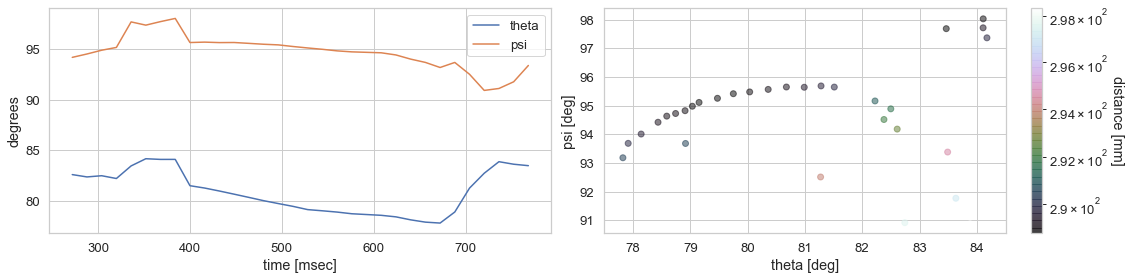

In [38]:
r, theta, psi = cart_to_spherical(exported_gaze, apply_rad2deg=True)

plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
sphere_pos_over_time(
    exported_gaze.world_index*16,
    data={"theta": theta, "psi": psi},
    unit="degrees"
)

plt.subplot(1, 2, 2)
sphere_pos(r, theta, psi, unit="degrees")

plt.tight_layout()

In [39]:
squared_theta_diff = np.diff(theta) ** 2
squared_psi_diff = np.diff(psi) ** 2
deg_diff = np.sqrt(squared_theta_diff + squared_psi_diff)
ts_diff = np.diff(exported_gaze.world_timestamp)
deg_per_sec = deg_diff / ts_diff

Text(0.5, 0, 'Gaze velocity [deg/sec]')

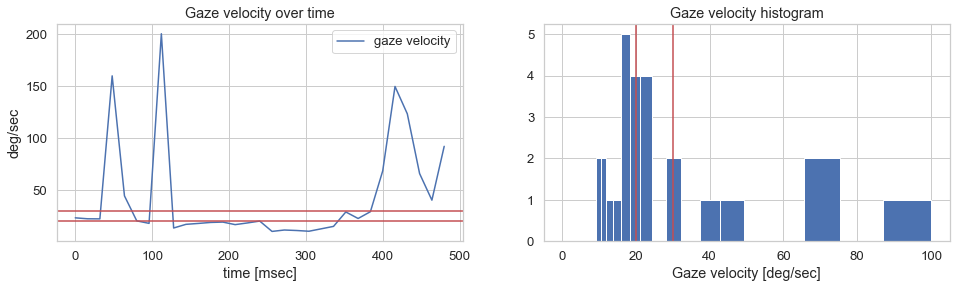

In [40]:
time = exported_gaze.world_index[:-1] - exported_gaze.world_index.iloc[0]

plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
sphere_pos_over_time(16*time, {"gaze velocity": deg_per_sec}, unit="deg/sec")
plt.axhline(y=20, color='r', linestyle='-')
plt.axhline(y=30, color='r', linestyle='-')


plt.title("Gaze velocity over time")

plt.subplot(1, 2, 2)
plt.hist(deg_per_sec, bins=np.logspace(-1, np.log10(100), 50))
plt.axvline(x=20, color='r', label='avline')
plt.axvline(x=30, color='r', label='avline')
plt.title("Gaze velocity histogram")
plt.xlabel("Gaze velocity [deg/sec]")

## saccade infromation
define saccade based on this paper:
https://physoc.onlinelibrary.wiley.com/doi/pdfdirect/10.1113/jphysiol.1969.sp008684

In [41]:
# define saccade as velociyt higher than 20 degree per sec and lower than 30
sccades = deg_per_sec[(deg_per_sec > 19) & (deg_per_sec < 31)] 
 # microsaccades are gaze movement higher than 30 degree per sec
microsaccedes = deg_per_sec[(deg_per_sec > 31)]

# number of saccades and microsaccades
sccades_duration =  len(sccades)*16
microsaccedes_duration = len(microsaccedes)*16

# mean velocity of saccades
sccades_vel = sccades.mean()
microsaccedes_vel = microsaccedes.mean()

## fixation analysis

In [42]:
fix_number = len(df_fix_c)
df_fix_c['duration'] = (df_fix_c.end_frame_index - df_fix_c.start_frame_index)*16
fix_mean_duration = df_fix_c.duration.mean()
fix_std_duration = round(df_fix_c.duration.std(),2)

In [43]:
dataframe= {'Id':[ID],
            'trial':[trial],
            'condition' : [condition],
           'numb_fix': [fix_number],
           'fix_mean_dur': [fix_mean_duration],
           'fix_std_dur' :[fix_std_duration],
           'QED':[QED],
           'sccades_dur' :[sccades_duration],
           'microsac_dur' : [microsaccedes_duration],
           'sccades_mean_vel' :[sccades_vel],
           'microsaccedes_vel' :[microsaccedes_vel],
           'performance' : [performance]
           
          }
 
# Create DataFrame
df_last = pd.DataFrame(dataframe)
df_last



,Id,trial,condition,numb_fix,fix_mean_dur,fix_std_dur,QED,sccades_dur,microsac_dur,sccades_mean_vel,microsaccedes_vel,performance
0,10,3,pre,0,NaN,NaN,140.0,144,144,22.996453,104.793787,2


In [45]:
df_last0=df_last0.append(df_last)
df_last0

,Id,trial,condition,numb_fix,fix_mean_dur,fix_std_dur,QED,sccades_dur,microsac_dur,sccades_mean_vel,microsaccedes_vel,performance
0,10.0,3.0,pre,0.0,NaN,NaN,140.0,144.0,144.0,22.996453,104.793787,2.0
0,10.0,3.0,pre,0.0,NaN,NaN,140.0,144.0,144.0,22.996453,104.793787,2.0
